In [96]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 解决坐标轴刻度负号乱码
plt.rcParams['axes.unicode_minus'] = False

# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['Simhei']

# Stream

## Preparation of Data

In [ ]:
os.chdir(r"C:\Users\CDA\Desktop\电商案例数据及数据说明\拜耳店铺数据")
stream_be=pd.read_excel("拜耳官方旗舰店流量渠道.xlsx")
del trade_index_be["交易指数.1"]
stream_be

In [17]:
os.chdir(r"C:\Users\CDA\Desktop\电商案例数据及数据说明\竞争数据\流量渠道数据")
stream_as=pd.read_excel("安速家居旗舰店流量渠道.xlsx")
stream_kl=pd.read_excel("科凌虫控旗舰店流量渠道.xlsx")

In [206]:
stream = pd.merge(stream_be,stream_as,how="left",on ="流量来源")
stream = pd.merge(stream,stream_kl,how="left",on ="流量来源")
stream.columns=["sourse","be","as","kl"]  #并表、设置列名

stream.index=[trade_index.sourse]
del stream["sourse"]  #设置表格索引

stream

,be,as,kl
sourse,,,
淘内免费,399466,119751,320128
手淘搜索,336457,86389,274916
淘内免费其他,195308,62653,153255
手淘问大家,123512,31348,108108
手淘旺信,88024,25514,59198
...,...,...,...
其它来源,0,0,0
其它来源,0,0,0
其它来源,0,0,0


In [207]:
trade_index.drop_duplicates(inplace=True)  #去重
trade_index

,be,as,kl
sourse,,,
淘内免费,399466,119751,320128
手淘搜索,336457,86389,274916
淘内免费其他,195308,62653,153255
手淘问大家,123512,31348,108108
手淘旺信,88024,25514,59198
猫客搜索,86179,34921,51920
手淘其他店铺商品详情,73179,19132,50018
手淘我的评价,57423,12220,46987
手淘首页,51703,19780,34823


In [250]:
trade_index.to_excel("1.流量-各平台交易指数.xlsx")

## Visualization

Text(0, 0.5, '流量')

ValueError: shape mismatch: objects cannot be broadcast to a single shape

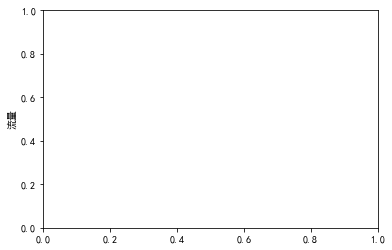

In [244]:
fig=plt.figure()
ax=plt.axes()

#设置坐标轴
sourse_empty=[]
sourse=list(trade_index.index)
for i in sourse:
    sourse_empty.append(i[0])
sourse = sourse_empty

x=np.arange(1,52,2) #设置x轴
bar_width=0.45
be=np.array(trade_index.be)
ax.set_ylabel("流量")

ax.bar(x,be,bar_width,align="center",label="be",alpha=0.5)   


ax.grid(linestyle="-.",color="r",axis="y",alpha=0.15)   

plt.show()

In [243]:
sourse_empty=[]
sourse=tuple(trade_index.index)
for i in sourse:
    sourse_empty.append(i[0])
sourse = sourse_empty
len(sourse)

52

# Sales in Recent 5 Months

## Preparation of Data

### data of Baier

In [214]:
os.chdir(r"C:\Users\CDA\Desktop\电商案例数据及数据说明\竞争数据\商品交易数据")
sales5_be=pd.read_excel("拜耳全店商品交易数据.xlsx")
sales5_be=sales5_be[["时间","商品","行业排名","交易指数","交易增长幅度","支付转化指数","交易金额"]]#去除不要的列

sales5_be.index=sales5_be.时间#设置索引
del sales5_be["时间"]

In [215]:
amount = sales5_be["交易金额"]/1000000
sales5_be = pd.concat([sales5_be,amount],axis=1)#改变单位

sales5_be.columns=["good","rank","trade_index","trade_growth","click_transform","amount1","amount(m)"]
sales5_be = sales5_be[["good","rank","trade_index","trade_growth","click_transform","amount(m)"]]

In [216]:
sales5_be

,good,rank,trade_index,trade_growth,click_transform,amount(m)
时间,,,,,,
2018-07-01,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,1,583483,0.0350,1500,9.354158
2018-07-01,进口蟑螂药一窝端德国拜耳拜灭士强力杀蟑胶饵蟑螂屋克星家用全窝,6,278542,0.1258,1194,2.470203
2018-07-01,德国拜耳进口蚂蚁药拜灭易灭蚁饵剂除杀蚂蚁杀虫剂家用室内全窝端,11,212329,0.5070,1328,1.518114
2018-07-01,进口蟑螂药德国拜耳拜灭士灭杀蟑胶饵剂粉屋克星全窝端12g家用,44,107697,-0.2044,1117,0.451897
2018-07-01,德国拜耳 除敌跳蚤杀虫剂家用灭蟑螂药虱子杀潮虫臭虫除虫剂喷雾,45,105901,-0.2134,936,0.438584
...,...,...,...,...,...,...
2018-11-01,德国拜耳上门除灭鼠灭白蚁蟑螂蚊子跳蚤苍蝇上海地区灭虫按件拍下,357,22585,2.4393,266,0.028969
2018-11-01,德国拜耳丁香医生限量款拜灭士加量家用蟑螂全窝端蟑螂药3支装,385,21568,1.2793,751,0.026743
2018-11-01,德国进口拜耳蟑螂药拜灭士杀蟑胶饵5g两盒套装全窝端杀灭蟑螂剂屋,418,20221,-0.3242,679,0.023914


In [217]:
months_be = sales5_be.resample(rule="m")#重采样统计月销量
a = months_be.sum()[["trade_index","click_transform","amount(m)"]]
b = months_be.mean()[["rank","trade_growth"]]
month_be = pd.concat([a,b],axis=1)
month_be

,trade_index,click_transform,amount(m),rank,trade_growth
时间,,,,,
2018-07-31,2343344,29984,17.024572,202.518519,0.411074
2018-08-31,2690122,32956,21.258818,220.433333,0.430060
2018-09-30,2939655,35279,21.383068,213.000000,31.567052
2018-10-31,2042402,26783,12.670673,174.625000,-0.345012
2018-11-30,1765755,31736,8.603488,197.000000,2.865336


### data of Ansu and Keling

In [227]:
sales5_as=pd.read_excel("安速全店商品交易数据.xlsx")
sales5_as=sales5_as[["日期","商品","行业排名","交易指数","交易增长幅度","支付转化指数","交易金额"]]

sales5_as.index=sales5_as.日期 #设置索引
del sales5_as["日期"]

amount = sales5_as["交易金额"]/1000000 #改单位
sales5_as = pd.concat([sales5_as,amount],axis=1)

sales5_as.columns=["good","rank","trade_index","trade_growth","click_transform","amount1","amount(m)"]
sales5_as = sales5_as[["good","rank","trade_index","trade_growth","click_transform","amount(m)"]]

In [232]:
sales5_kl=pd.read_excel("科凌虫控全店商品交易数据.xlsx")
sales5_kl=sales5_kl[["日期","商品","行业排名","交易指数","交易增长幅度","支付转化指数","交易金额"]]

sales5_kl.index=sales5_kl.日期#设置索引
del sales5_kl["日期"]

amount = sales5_kl["交易金额"]/1000000 #改单位
sales5_kl = pd.concat([sales5_kl,amount],axis=1)

sales5_kl.columns=["good","rank","trade_index","trade_growth","click_transform","amount1","amount(m)"]
sales5_kl = sales5_kl[["good","rank","trade_index","trade_growth","click_transform","amount(m)"]]

In [230]:
months_as = sales5_as.resample(rule="m")#重采样统计月销量
a = months_as.sum()[["trade_index","click_transform","amount(m)"]]
b = months_as.mean()[["rank","trade_growth"]]
month_as = pd.concat([a,b],axis=1)
month_as

,trade_index,click_transform,amount(m),rank,trade_growth
日期,,,,,
2018-07-31,1791005,38165,7.045146,245.968750,4.940209
2018-08-31,1870832,36220,8.491096,230.806452,0.440126
2018-09-30,1710438,37209,6.964899,267.483871,0.067200
2018-10-31,1196519,27353,4.380033,248.043478,0.092900
2018-11-30,1045709,31199,3.254937,251.666667,0.594204


In [233]:
months_kl = sales5_kl.resample(rule="m")#重采样统计月销量
a = months_kl.sum()[["trade_index","click_transform","amount(m)"]]
b = months_kl.mean()[["rank","trade_growth"]]
month_kl = pd.concat([a,b],axis=1)
month_kl

,trade_index,click_transform,amount(m),rank,trade_growth
日期,,,,,
2018-07-31,1814681,28952,11.081418,151.095238,0.396952
2018-08-31,1940656,33571,11.278990,173.478261,0.186061
2018-09-30,1927616,32635,10.983245,159.782609,0.711713
2018-10-31,1601956,34804,7.193435,222.461538,31.018904
2018-11-30,1496348,33362,5.975616,199.240000,0.142348


In [234]:
month_be.to_excel("be_trasaction_in_recent_5months.xlsx")
month_as.to_excel("as_trasaction_in_recent_5months.xlsx")
month_kl.to_excel("kl_trasaction_in_recent_5months.xlsx")

## Analysis

# Products Sold in Recent 30 Days

## Preparation of data

### data of Baier

In [395]:
sales30_be=pd.read_excel("拜耳近30天销售数据.xlsx")
sales30_be=sales30_be[
    ["店铺名称","商品名称","商品原价","商品售价","30天销售量","总销量","使用对象","销售额"]
]#去除不要的列
discount_be = (sales30_be.商品原价-sales30_be.商品售价)/sales30_be.商品原价
sales30_be = pd.concat([sales30_be,discount],axis=1).round(2)#加入折扣率


In [401]:
sales30_be.columns=[
    "shops","goods","original_price","sales_price","sales_in_30days","total_sales","target","sales_figure_in_30days","discount_rate"
]
sales30_be.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 9 columns):
shops                     15 non-null object
goods                     15 non-null object
original_price            15 non-null float64
sales_price               15 non-null float64
sales_in_30days           15 non-null int64
total_sales               15 non-null int64
target                    15 non-null object
sales_figure_in_30days    15 non-null float64
discount_rate             15 non-null float64
dtypes: float64(4), int64(2), object(3)
memory usage: 1.2+ KB


In [402]:
sales30_be.sort_values(["sales_in_30days"],ascending=False)

,shops,goods,original_price,sales_price,sales_in_30days,total_sales,target,sales_figure_in_30days,discount_rate
0,拜耳官方旗舰店,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,109.0,39.9,43542,3023212,蟑螂,1737325.8,0.63
1,拜耳官方旗舰店,德国拜耳进口蚂蚁药拜灭易灭蚁饵剂除杀蚂蚁杀虫剂家用室内全窝端,199.0,59.9,4860,285440,蚂蚁,291114.0,0.70
5,拜耳官方旗舰店,德国拜耳拜灭士蟑螂药一窝端进口全窝端家用灭除杀蟑胶饵5g包邮,109.0,39.9,3342,15078,蟑螂,133345.8,0.63
4,拜耳官方旗舰店,德国拜耳 除敌跳蚤杀虫剂家用灭蟑螂药虱子杀潮虫臭虫除虫剂喷雾,109.0,39.9,1641,155203,杀虫剂,65475.9,0.63
3,拜耳官方旗舰店,德国拜耳拜灭士5g+除敌5ml*4支进口蟑螂药家用全窝端杀蟑螂套装,198.0,79.9,1487,19602,蟑螂,118811.3,0.60
6,拜耳官方旗舰店,进口蟑螂药德国拜耳拜灭士杀蟑胶饵蟑螂克星全窝端家用灭蟑屋12g,199.0,79.9,1320,109234,蟑螂,105468.0,0.60
7,拜耳官方旗舰店,德国拜耳跳蚤杀虫剂家用潮虫灭蛾蚋虱子臭虫药除蟑螂5ml*4,99.0,39.9,952,32179,杀虫剂,37984.8,0.60
2,拜耳官方旗舰店,德国拜耳进口白蚁药除灭防杀白蚁杀虫剂全窝端家用特傚触杀型粉药,199.0,89.9,838,70516,白蚁,75336.2,0.55
9,拜耳官方旗舰店,德国拜耳拜灭易进口蚂蚁药一窝端灭蚁饵剂清除蚂蚁粉家用全窝端,199.0,59.9,482,2352,蟑螂,28871.8,0.70
10,拜耳官方旗舰店,德国拜耳拜灭士5g+拜灭易12g进口杀蟑螂蚂蚁药蟑螂克星家用全窝端,198.0,114.0,196,3440,蟑螂,22344.0,0.42


### data of Ansu and Keling

In [398]:
os.chdir(r"C:\Users\CDA\Desktop\电商案例数据及数据说明\竞争数据\商品销售数据")
sales30_as=pd.read_excel("安速家居近30天销售数据.xlsx")
sales30_as=sales30_as[
    ["店铺名称","商品名称","商品原价","商品售价","30天销售量","总销量","适用对象","30天销售额"]
]#去除不要的列
discount_as = (sales30_as.商品原价-sales30_as.商品售价)/sales30_as.商品原价
sales30_as = pd.concat([sales30_as,discount_as],axis=1).round(2)#加入折扣率

sales30_kl=pd.read_excel("科凌虫控旗舰店近30天销售数据.xlsx")
sales30_kl=sales30_kl[
    ["店铺名称","商品名称","商品原价","商品售价","30天销售量","总销量","适用对象","30天销售额"]
]#去除不要的列
discount_kl = (sales30_kl.商品原价-sales30_kl.商品售价)/sales30_kl.商品原价
sales30_kl = pd.concat([sales30_kl,discount_kl],axis=1).round(2)#加入折扣率

In [399]:
sales30_as.columns=[
     "shops","goods","original_price","sales_price","sales_in_30days","total_sales","target","sales_figure_in_30days","discount_rate"
]

sales30_kl.columns=[
     "shops","goods","original_price","sales_price","sales_in_30days","total_sales","target","sales_figure_in_30days","discount_rate"
]


In [400]:
sales30_as.sort_values(["sales_in_30days"],ascending=False)
sales30_kl.sort_values(["sales_in_30days"],ascending=False)

,shops,goods,original_price,sales_price,sales_in_30days,total_sales,target,sales_figure_in_30days,discount_rate
5,安速家居旗舰店,日本进口安速天然除螨喷雾剂350ml床上免洗家用正品螨虫非除杀菌,98.0,49.9,3132,13846,螨,156286.8,0.49
0,安速家居旗舰店,日本进口安速小强恢恢灭蟑螂屋药无毒捕捉器克星家用强力清全窝端,60.0,54.4,2540,236321,蟑螂,138176.0,0.09
2,安速家居旗舰店,日本安速小强恢恢蟑螂屋药6片 无毒捕捉器强力灭清克星家用全窝端,33.4,29.9,1073,117070,蟑螂,32082.7,0.10
1,安速家居旗舰店,日本进口安速小强恢恢蟑螂屋5片药捕捉器灭杀蟑螂克星家用全窝端,32.0,29.9,883,10498,蟑螂,26401.7,0.07
4,安速家居旗舰店,日本安速小黑帽小强黑克杀蟑饵剂9枚 蟑螂药屋蟑螂克星家用全窝端,58.0,48.0,566,19705,蟑螂,27168.0,0.17
8,安速家居旗舰店,日本进口安速杀蝇饵剂苍蝇药1盒 粘蝇纸灭苍蝇贴强力神家用捕蝇器,48.0,24.8,515,16551,蝇,12772.0,0.48
3,安速家居旗舰店,日本进口安速红阿斯杀虫烟雾剂弹烟熏灭跳蚤蟑螂克星家用全窝端,48.0,45.5,471,55672,蟑螂,21430.5,0.05
10,安速家居旗舰店,日本安速杀蟑气雾剂精纯无味型450ml2瓶灭蟑螂药杀虫剂家用百虫灵,42.2,39.9,352,5222,杀虫剂,14044.8,0.05
6,安速家居旗舰店,日本安速蟑螂药12枚家用灭杀蟑螂屋胶饵剂清强力捕捉器克星全窝端,42.0,29.8,291,31395,蟑螂,8671.8,0.29
7,安速家居旗舰店,日本安速杀蟑气雾剂精纯无味型2瓶 灭蟑螂药杀虫剂家用潮虫百虫灵,65.8,58.0,266,2421,杀虫剂,15428.0,0.12


,shops,goods,original_price,sales_price,sales_in_30days,total_sales,target,sales_figure_in_30days,discount_rate
0,科凌虫控旗舰店,蟑螂药一窝端蟑螂屋胶饵灭蟑螂无毒厨房家用强力杀蟑螂克星全窝端,49.9,16.8,76608,3175991,蟑螂,1287014.4,0.66
8,科凌虫控旗舰店,除螨虫家用喷剂床上去防螨祛螨虫神器喷雾剂包贴杀虫剂免洗非杀菌,99.0,30.8,35788,144672,螨,1102270.4,0.69
5,科凌虫控旗舰店,老鼠贴超强力粘鼠板灭鼠神器捕鼠魔毯yao颗粒老鼠胶家用药捕鼠器,49.9,29.8,17610,172851,鼠,524778.0,0.40
9,科凌虫控旗舰店,去儿童头虱除阴虱净喷剂百部酊虱卵用虱子药成人一扫光净虱灵喷雾,65.0,25.1,7395,80838,虱,185614.5,0.61
4,科凌虫控旗舰店,粘鼠板超强力驱老鼠贴灭鼠抓老鼠夹药捕鼠器黏老鼠胶沾鼠神器家用,48.9,13.8,6408,324171,鼠,88430.4,0.72
1,科凌虫控旗舰店,蟑螂屋强力灭蟑清蟑螂贴家用无毒粉杀蟑螂药胶饵捕捉器克星全窝端,39.0,19.8,5852,174989,蟑螂,115869.6,0.49
6,科凌虫控旗舰店,4 只装驱老鼠夹捕鼠器家用灭鼠神器抓杀扑老鼠夹子捉老鼠笼全自动,39.8,19.9,3153,71878,鼠,62744.7,0.50
7,科凌虫控旗舰店,老鼠笼捕鼠器全自动超强家用抓老鼠夹药捉耗子连续灭鼠神器驱鼠器,38.0,29.8,2883,65127,鼠,85913.4,0.22
2,科凌虫控旗舰店,科凌虫控蟑螂药屋蟑螂克星杀蟑胶饵灭蟑螂粉全窝端家用强力灭蟑清,49.9,39.0,2497,74352,蟑螂,97383.0,0.22
11,科凌虫控旗舰店,老鼠笼捕鼠器家用一窝端连续全自动强力扑捉抓灭老鼠夹子捕鼠神器,69.0,29.8,2215,4099,鼠,66007.0,0.57


In [412]:
sales30 = pd.concat([sales30_be,sales30_as,sales30_kl])
sales30
sales30.to_excel("2.近30天产品销售情况.xlsx")

,shops,goods,original_price,sales_price,sales_in_30days,total_sales,target,sales_figure_in_30days,discount_rate
0,拜耳官方旗舰店,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,109.0,39.9,43542,3023212,蟑螂,1737325.8,0.63
1,拜耳官方旗舰店,德国拜耳进口蚂蚁药拜灭易灭蚁饵剂除杀蚂蚁杀虫剂家用室内全窝端,199.0,59.9,4860,285440,蚂蚁,291114.0,0.70
2,拜耳官方旗舰店,德国拜耳进口白蚁药除灭防杀白蚁杀虫剂全窝端家用特傚触杀型粉药,199.0,89.9,838,70516,白蚁,75336.2,0.55
3,拜耳官方旗舰店,德国拜耳拜灭士5g+除敌5ml*4支进口蟑螂药家用全窝端杀蟑螂套装,198.0,79.9,1487,19602,蟑螂,118811.3,0.60
4,拜耳官方旗舰店,德国拜耳 除敌跳蚤杀虫剂家用灭蟑螂药虱子杀潮虫臭虫除虫剂喷雾,109.0,39.9,1641,155203,杀虫剂,65475.9,0.63
...,...,...,...,...,...,...,...,...,...
22,科凌虫控旗舰店,科凌虫控电子猫驱鼠器超声波大功率家用强力老鼠干扰器灭捕鼠神器,289.0,139.0,31,2826,鼠,4309.0,0.52
23,科凌虫控旗舰店,飞蛾诱捕器蛾子粘捕器粉蛾小飞虫米虫米面蛾灭米蛾子蛾蚋蛾蠓衣蛾,28.0,14.5,35,1782,蛾,507.5,0.48
24,科凌虫控旗舰店,宠物家用跳蚤捕捉器飞蛾诱捕器杀灭跳蚤神器蛾蚊灯杀虫剂跳骚药水,168.0,79.0,22,3086,虫,1738.0,0.53
25,科凌虫控旗舰店,科凌虫控多功能诱虫灯粘跳蚤灯配套粘虫板 飞虫飞蛾诱虫板跳蚤纸,39.8,19.8,9,3085,虫,178.2,0.50


## sales analysis

# Comments Analysis

## Paparation of Context

### load data

In [242]:
os.chdir(r"C:\Users\CDA\Desktop\电商案例数据及数据说明\竞争数据\评论舆情数据")
context_be = pd.read_excel("拜耳.xlsx")
context_as = pd.read_excel("安速.xlsx")
context_kl = pd.read_excel("科凌.xlsx")

In [243]:
context_be.index=context_be["评论日期"]
context_be = context_be[["评论"]]
context_be.columns=["comments"]

context_as.index=context_as["评论日期"]
context_as = context_as[["评论"]]
context_as.columns=["comments"]

context_kl.index=context_kl["评论日期"]
context_kl = context_kl[["评论"]]
context_kl.columns=["comments"]

In [245]:
context_be.to_excel("context_be.xlsx")
context_as.to_excel("context_as.xlsx")
context_kl.to_excel("context_kl.xlsx")

### encoding (pre-lcut)

In [161]:
os.chdir(r"C:\Users\CDA\Desktop\电商案例数据及数据说明\竞争数据\评论舆情数据")

In [157]:
def cleaning(x):     #处理不要的评论
    for i in x:           
        while r"&hellip;"in i:
            x.remove(i)
            i=i.replace(r"&hellip;","")
            x.append(i)
        if i =="此用户没有填写评论!"or "还没用"in i or "好评好评好评" in i:
            x.remove(i)

In [210]:
a=["aa","ab&hellip;","ab","ac","还没用","好评好评好评"]
for i in a:
    i = a.pop(a.index(i))
    while "&hellip;"in i:    
        i = i.replace(r"&hellip;","")
    a.append(i)
    
    if i =="aa"or "还没用"in i or "好评好评好评" in i:
        a.remove(i)
a

['ab&hellip;', 'ac', '好评好评好评', 'ab']

In [162]:
comments_be = context_be.comments.values.tolist()

cleaning(comments_be)

for one_data in comments_be:     #写入文档转码
    with open(r'be_comments.txt', 'a', encoding='utf-8') as f:#上下文管理
        f.write(one_data + '\n')
f=open("be_comments.txt","rb")
txt_be=f.read()
f.close()

143

170

30

33

36

78

123

79

235

147

155

317

21

8

97

191

134

143

170

30

33

36

78

123

79

235

147

155

317

21

8

97

191

134

184

56

80

158

101

57

275

138

92

182

165

140

41

77

183

206

91

143

112

135

160

43

31

32

47

142

64

56

122

163

122

57

88

138

137

39

11

43

31

123

61

103

31

42

134

219

5

165

135

31

158

74

202

38

71

94

162

63

20

131

93

102

46

25

107

150

82

174

31

62

154

114

125

31

88

33

62

48

39

21

48

65

92

66

93

21

114

24

44

116

47

36

57

27

186

64

33

55

92

131

100

25

125

179

46

25

54

211

70

22

112

127

219

61

71

60

50

76

102

35

96

20

119

111

57

46

67

44

32

23

17

78

54

14

113

31

46

59

188

131

54

41

21

22

43

15

71

64

72

120

24

108

55

99

131

8

16

31

107

13

59

52

194

39

39

143

134

16

48

37

142

174

18

63

20

14

49

151

57

95

41

46

56

10

65

25

97

5

65

268

46

28

87

33

53

26

45

24

52

57

62

52

28

25

53

27

58

168

160

46

61

77

19

29

30

58

29

51

41

109

41

37

74

25

148

55

15

67

35

46

53

106

41

38

29

45

13

26

27

231

20

4

6

37

22

37

31

69

56

26

36

49

47

26

30

45

30

10

26

35

53

14

39

33

81

60

21

19

38

29

19

23

108

29

2

2

60

28

30

37

50

22

19

37

17

22

21

57

33

26

31

26

136

16

20

17

38

72

22

38

20

24

81

19

32

58

34

24

35

5

17

25

43

23

54

208

43

89

36

102

59

27

15

39

16

43

5

124

15

183

46

15

93

26

28

38

39

40

25

33

27

48

24

3

24

121

49

22

121

15

27

90

70

33

37

165

9

27

37

37

26

20

28

31

22

71

20

79

42

106

25

34

22

125

72

38

26

25

22

23

22

28

20

75

108

17

24

22

27

29

30

22

97

9

22

28

11

59

27

20

79

35

111

13

18

70

28

31

31

161

42

152

17

44

42

137

21

20

20

49

51

28

108

89

34

46

18

20

20

18

21

19

98

16

11

21

18

26

18

52

141

18

20

31

162

49

16

27

36

10

21

17

23

43

20

15

27

198

39

25

45

154

56

60

26

164

20

15

17

12

32

41

29

50

16

14

47

16

41

16

73

60

40

124

37

14

16

16

27

123

10

102

13

7

82

32

15

12

32

22

30

21

14

12

11

39

33

24

128

154

12

13

33

36

14

15

12

9

79

12

14

9

51

115

30

28

55

14

22

24

28

16

16

15

35

11

88

13

23

11

120

24

21

16

103

78

29

14

12

13

24

22

54

72

31

71

13

11

10

40

40

12

39

8

32

31

24

35

22

33

8

40

54

20

19

12

50

33

12

10

18

22

8

27

9

20

18

10

43

10

11

5

8

9

8

50

9

8

91

18

22

50

44

13

10

81

10

11

7

20

18

27

17

26

22

30

20

28

10

15

10

25

20

15

8

23

24

19

24

10

77

8

20

19

18

9

10

8

9

20

9

9

6

6

6

6

18

185

7

25

38

9

6

42

189

42

55

52

8

8

33

55

41

27

9

9

3

4

3

10

19

7

7

15

6

62

5

5

23

37

15

11

15

5

15

21

24

7

41

94

19

5

7

26

19

21

37

23

48

36

20

39

35

15

55

15

16

14

38

31

17

14

12

16

46

45

5

34

31

14

15

25

38

5

18

5

16

14

46

31

11

13

21

39

43

21

31

18

16

26

3

30

46

35

29

14

18

13

22

17

14

23

40

30

27

21

12

12

49

9

27

11

12

13

13

14

35

62

12

11

28

12

9

31

12

2

15

19

28

15

37

11

22

20

28

30

20

13

19

15

21

22

53

69

79

35

56

12

28

12

12

14

63

296

18

12

17

16

10

10

6

16

75

21

33

31

26

26

34

9

23

26

28

90

10

11

53

99

12

10

15

26

27

8

11

9

11

23

14

12

44

74

47

9

8

23

30

36

9

10

48

31

14

28

24

22

38

29

17

11

25

18

14

11

10

10

8

8

8

26

24

15

41

143

6

177

21

70

7

25

22

61

37

33

30

27

17

28

32

32

9

27

19

9

187

9

26

9

7

7

15

10

24

28

10

14

38

15

276

17

111

43

18

37

8

21

9

35

8

16

32

45

24

18

8

7

13

14

34

39

16

13

42

8

7

7

24

21

41

6

49

29

22

13

14

38

24

10

39

43

23

57

35

11

24

17

11

52

5

6

20

6

6

34

23

5

5

6

5

6

5

6

6

6

5

5

6

5

5

6

26

21

14

37

23

57

5

7

5

22

24

18

11

37

18

21

36

122

25

20

10

32

15

49

32

40

15

19

21

14

19

34

12

11

14

11

20

27

128

62

21

23

20

25

36

17

25

20

11

11

30

25

19

11

31

22

32

18

23

27

19

41

11

28

35

8

9

44

20

15

9

17

68

20

77

18

17

71

27

7

18

17

13

33

41

91

5

69

27

145

18

20

34

17

24

11

8

9

23

17

55

37

25

16

8

7

19

18

17

9

16

18

25

29

16

84

28

19

16

32

15

35

14

17

7

15

17

31

20

27

21

32

17

6

18

16

18

15

11

68

24

76

16

54

23

27

48

32

11

18

16

11

30

15

41

31

11

20

16

13

18

14

9

25

108

16

6

6

14

13

12

13

25

5

11

5

12

14

89

14

16

32

25

25

8

11

21

16

14

11

26

11

30

24

28

13

25

66

11

14

14

14

128

128

76

56

38

34

131

72

75

124

23

44

103

78

83

44

31

96

27

18

6

38

14

28

46

15

77

22

4

30

23

43

In [160]:
comments_as = context_as.comments.values.tolist()

cleaning(comments_as)

for one_data in comments_as:
    with open(r'as_comments.txt', 'a', encoding='utf-8') as f:#上下文管理
        f.write(one_data + '\n')
f=open("as_comments.txt","rb")
txt_as=f.read()
f.close()      #将评论list写入txt转码再提取到txt_as/be/kl进行分词

120

104

115

90

138

122

139

78

87

118

61

101

138

41

120

104

115

90

138

122

139

78

87

118

61

101

138

41

122

146

21

176

342

124

161

109

136

20

152

222

89

87

27

6

99

154

90

31

114

147

171

82

132

14

65

115

106

132

81

182

75

151

5

183

104

42

59

74

22

46

26

109

64

156

33

22

172

85

84

11

35

53

119

120

5

49

128

42

41

27

80

37

42

144

64

32

112

23

97

44

150

77

36

35

250

126

122

91

12

63

23

42

218

151

17

17

26

59

106

33

147

15

79

47

21

107

91

35

42

11

125

200

94

65

54

14

16

20

53

71

61

23

86

29

10

84

41

6

45

41

97

23

28

30

116

89

8

37

16

13

43

35

52

11

16

14

82

19

32

53

6

43

17

11

9

34

32

141

62

33

53

13

9

28

27

13

7

39

25

16

28

29

58

11

38

111

5

36

54

32

39

36

4

39

19

154

30

10

4

40

58

33

161

97

27

31

48

35

44

35

6

38

20

85

27

84

143

11

38

25

28

40

25

23

10

47

90

40

35

27

21

147

42

23

21

14

30

212

23

24

28

17

23

110

41

31

20

11

44

39

26

132

109

27

30

22

223

18

18

24

45

19

19

9

22

39

27

29

63

25

20

17

20

206

182

23

24

8

11

16

17

14

40

11

38

17

23

16

5

13

28

18

19

13

17

12

33

25

21

31

25

13

43

22

24

25

13

156

16

18

22

21

32

19

84

13

9

24

10

11

11

24

10

30

24

29

12

11

23

12

22

58

7

13

11

10

10

9

4

21

8

20

21

18

51

21

36

9

22

16

35

8

31

85

50

20

162

20

26

20

9

11

43

34

183

16

17

81

5

17

20

135

59

38

65

65

35

27

3

16

74

5

6

6

14

33

66

26

37

6

15

41

6

6

41

24

160

37

15

6

16

20

33

39

38

4

11

91

20

14

31

27

17

6

12

13

50

15

4

48

15

21

19

21

12

25

11

10

11

11

11

32

22

12

10

12

13

23

12

15

11

12

42

11

10

10

20

8

37

10

8

13

12

30

10

19

10

11

10

11

9

10

9

9

42

64

16

18

17

9

9

8

17

10

10

12

73

49

26

51

25

59

9

10

15

21

184

23

8

154

8

7

35

18

29

8

22

10

8

86

7

9

19

27

8

7

6

17

20

56

22

11

15

16

146

23

32

31

6

22

5

9

7

6

5

5

5

6

6

5

5

5

6

6

5

11

5

32

54

54

17

13

13

68

11

41

45

10

34

7

7

15

6

6

19

10

34

11

13

20

24

19

28

6

18

17

6

7

180

132

46

58

17

57

14

15

16

38

28

18

7

17

17

18

15

29

8

28

11

6

29

16

11

28

17

31

7

17

34

12

35

28

6

5

45

14

30

35

38

30

10

16

10

9

5

11

18

16

100

15

8

8

14

10

33

26

28

14

165

12

15

8

12

23

12

10

19

11

27

24

30

22

34

12

70

11

11

20

25

9

43

21

12

29

11

9

20

101

21

31

18

63

28

206

154

22

18

32

53

18

112

12

10

21

11

9

28

67

11

18

28

16

7

40

19

10

24

27

6

16

8

23

7

117

9

26

14

20

79

7

21

16

33

5

17

14

16

5

16

16

23

15

15

25

103

6

17

15

14

16

17

45

14

12

189

23

12

21

13

22

13

123

12

13

16

14

14

14

30

11

102

133

18

21

44

15

15

15

29

14

15

15

12

13

13

13

11

10

12

15

14

14

18

50

12

13

18

11

47

13

13

21

11

11

40

13

55

7

156

9

10

10

16

13

16

9

9

9

9

20

8

6

16

12

22

10

10

5

9

10

65

17

23

7

13

156

85

103

24

28

7

11

74

7

9

7

7

14

10

29

5

6

9

15

76

188

9

7

16

38

6

5

7

7

9

15

42

13

9

6

10

7

20

7

5

5

5

5

5

5

6

5

7

5

5

6

5

24

16

11

24

14

57

12

13

7

14

11

12

10

6

31

13

7

7

48

6

119

38

12

11

11

9

32

30

28

8

70

38

44

8

8

50

9

10

9

7

16

5

8

37

181

12

6

7

33

12

10

18

9

14

10

10

5

6

5

24

84

5

11

72

4

3

9

20

32

7

19

24

49

36

38

19

48

122

8

6

32

54

320

7

6

24

35

10

11

28

5

143

32

26

23

30

34

33

43

5

32

28

14

46

72

88

29

26

19

31

11

19

13

57

26

42

20

20

22

33

21

36

16

28

29

18

18

33

31

30

19

27

30

29

41

17

24

29

24

39

25

14

23

12

42

20

22

17

28

21

57

32

22

8

35

16

15

35

22

44

26

14

14

46

22

26

35

6

146

14

72

5

23

19

5

5

23

13

13

22

20

20

6

13

13

262

12

21

13

11

44

18

23

12

30

12

36

21

24

13

11

9

20

32

20

26

18

23

69

29

18

18

15

21

29

47

16

17

15

40

25

24

17

7

21

6

6

17

16

19

17

25

18

26

6

6

5

5

13

14

80

40

10

88

34

19

14

19

26

71

10

14

17

17

16

13

53

60

13

110

11

11

16

11

33

127

13

11

30

27

13

11

14

13

10

23

21

21

11

16

11

14

13

29

14

14

21

24

12

12

19

10

23

19

10

13

19

11

21

13

40

86

45

14

51

12

11

12

10

11

10

11

12

12

11

14

11

12

36

11

9

11

12

11

10

14

55

36

16

38

11

11

10

8

78

38

12

8

17

59

38

11

14

67

8

7

10

8

18

23

8

8

7

8

15

19

13

12

11

102

11

19

12

15

29

9

10

5

9

420

26

7

33

13

117

124

198

192

37

40

92

103

51

31

172

64

6

28

25

21

16

In [159]:
comments_kl = context_kl.comments.values.tolist()

cleaning(comments_kl)

for one_data in comments_kl:
    with open(r'kl_comments.txt', 'a', encoding='utf-8') as f:#上下文管理
        f.write(one_data + '\n')
f=open("kl_comments.txt","rb")
txt_kl = f.read()
f.close()

174

13

98

69

223

101

101

220

206

129

194

44

103

39

180

174

13

98

69

223

101

101

220

206

129

194

44

103

39

180

50

101

31

35

115

11

25

206

12

46

32

146

64

98

100

100

80

48

159

181

110

12

36

81

223

131

74

17

103

27

130

29

54

90

27

87

35

32

25

39

24

17

23

24

223

157

32

14

22

25

71

148

94

103

94

232

83

18

16

96

27

12

62

209

17

29

73

30

84

96

103

94

37

37

48

57

26

106

243

232

41

144

11

21

15

22

119

34

105

57

100

10

56

94

104

34

18

79

44

43

110

28

53

18

71

59

101

27

37

29

184

45

40

84

45

44

38

31

140

62

28

66

169

84

138

25

23

18

32

11

29

54

32

34

7

24

110

86

47

41

182

58

105

51

33

83

100

48

11

18

56

10

54

27

26

48

81

32

42

82

43

7

45

30

56

33

41

25

158

52

26

37

72

26

50

194

27

37

39

31

10

5

4

47

223

223

29

27

92

33

41

71

48

156

34

20

20

58

20

32

339

52

20

15

28

26

30

33

5

46

70

56

31

2

2

9

128

19

85

35

14

26

20

43

29

19

33

35

40

40

16

81

15

34

81

20

92

26

81

16

30

47

20

21

29

27

37

29

28

5

45

32

26

35

27

39

27

43

50

6

15

104

147

147

27

27

24

61

24

29

91

110

24

28

38

27

29

27

47

39

32

21

232

31

59

26

31

30

20

24

19

81

32

20

55

30

22

23

154

20

32

11

21

33

27

11

18

223

30

51

30

12

32

29

26

17

19

70

56

19

46

19

26

25

12

9

19

19

18

19

30

26

29

19

55

27

23

20

65

16

19

34

140

10

20

17

16

29

82

49

16

15

17

5

20

21

17

16

33

19

27

23

19

17

22

28

12

18

7

49

14

19

30

16

19

27

32

18

27

11

67

17

19

21

28

35

9

46

47

22

25

15

72

25

15

14

16

18

29

13

23

16

13

14

16

14

23

13

29

43

51

17

30

17

23

26

23

21

13

13

14

11

14

23

16

24

55

51

11

15

22

15

12

5

5

19

51

10

11

10

12

11

11

11

11

37

61

21

48

13

15

11

11

11

33

12

22

9

9

24

20

16

33

14

12

12

22

17

10

9

10

9

27

27

37

30

21

22

46

23

10

10

66

22

12

10

9

11

11

11

16

17

18

23

28

53

10

5

138

46

26

10

9

22

21

8

34

48

22

14

33

12

29

9

10

34

12

14

56

28

20

20

26

18

19

23

9

36

35

10

9

17

8

7

7

17

17

8

20

57

17

7

5

19

20

18

8

268

58

21

17

21

23

67

25

8

10

17

19

7

6

7

6

6

8

50

104

46

53

25

44

59

12

15

45

19

7

23

13

3

18

14

22

43

17

44

18

5

5

5

28

24

17

35

17

29

147

5

6

5

6

19

15

25

6

16

17

18

24

12

25

21

20

15

15

51

9

31

18

14

16

21

17

148

53

12

21

24

35

34

24

18

12

34

21

4

14

16

7

14

39

11

16

13

15

13

14

15

16

14

6

15

24

41

15

58

73

13

12

95

19

91

11

14

38

38

33

57

39

37

13

13

13

19

13

13

15

12

17

26

55

10

10

11

12

13

30

12

11

13

46

12

14

15

73

41

34

14

16

40

21

119

30

9

15

16

29

10

62

30

12

202

31

18

18

13

49

20

11

12

23

14

12

10

12

10

12

26

59

5

16

30

10

21

20

33

51

16

11

31

28

10

30

9

52

9

51

11

55

16

14

20

13

12

10

13

13

58

16

16

32

10

11

11

28

40

12

10

28

9

8

8

19

24

119

12

10

11

29

9

32

15

11

56

39

15

25

31

17

41

45

13

10

10

44

11

10

9

9

9

65

18

27

43

74

43

15

22

9

7

28

9

16

32

152

8

25

26

25

47

9

108

49

10

27

17

9

14

8

10

8

11

11

21

13

32

10

9

8

20

24

8

27

42

8

29

7

7

131

114

114

7

13

19

23

13

24

10

36

23

26

24

11

10

9

11

20

114

8

8

7

130

11

8

9

7

7

14

15

38

12

21

6

21

6

7

6

6

27

7

8

6

6

6

6

12

118

22

22

201

33

18

9

19

20

14

24

11

10

11

11

52

35

25

25

6

7

8

21

33

105

13

39

27

13

48

5

33

13

71

5

5

5

6

5

6

11

5

6

5

5

5

5

5

35

5

18

11

23

14

147

26

11

23

24

39

13

10

8

21

27

7

17

14

39

20

11

19

11

22

10

21

33

13

13

38

19

9

11

38

24

5

18

23

16

22

7

7

75

40

22

22

6

18

16

13

21

35

22

33

34

17

193

6

20

10

18

22

34

15

19

11

13

33

16

36

21

15

37

25

6

18

11

21

5

5

19

6

30

16

22

20

11

11

16

13

13

28

22

18

19

8

27

16

18

39

7

8

17

9

18

18

11

39

28

256

32

15

16

27

28

165

11

16

19

17

28

21

25

15

38

15

7

9

12

14

14

6

7

11

6

6

6

17

16

24

31

58

16

20

11

14

11

25

17

43

30

16

11

151

14

26

51

16

11

20

12

10

6

47

28

23

14

28

9

15

5

5

5

87

31

26

14

15

29

10

10

10

11

16

16

28

18

36

6

14

17

25

11

14

223

11

27

12

42

22

29

25

59

8

33

24

15

23

36

13

13

27

5

13

10

12

23

11

23

23

32

14

11

13

28

21

33

19

45

15

5

5

25

24

7

13

14

13

12

30

23

9

6

153

82

17

38

17

78

23

18

8

42

53

70

75

13

4

21

6

31

## NLP

### Sentiments

In [121]:
from snownlp import SnowNLP
score_empty=[]
for i in comments_be:
    s = SnowNLP(i).sentiments
    score_empty.append(s)
score_avg_be = np.mean(score_empty)
score_avg_be

0.3823303896533564

In [122]:
score_empty=[]
for i in comments_as:
    s = SnowNLP(i).sentiments
    score_empty.append(s)
score_avg_as = np.mean(score_empty)
score_avg_as

0.4519065623150069

In [123]:
score_empty=[]
for i in comments_kl:
    s = SnowNLP(i).sentiments
    score_empty.append(s)
score_avg_kl = np.mean(score_empty)
score_avg_kl

0.41162742972079724

### wordcloud

In [4]:
import jieba
import wordcloud
from wordcloud import STOPWORDS
words  = jieba.lcut(txt_be)#列表，列表里面的元素为字符串格式
newtxt= ' '.join(words)
w=wordcloud.WordCloud(width=1000,height=700,stopwords=STOPWORDS,font_path="C:/Windows/Fonts/STLITI.ttf",background_color = 'white')
wordcloud=w.generate(newtxt)
plt.imshow(wordcloud)
plt.axis('off')

NameError: name 'txt_be' is not defined

(-0.5, 999.5, 699.5, -0.5)

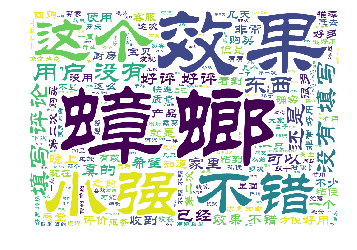

In [93]:
import jieba
import wordcloud
from wordcloud import STOPWORDSwords  = jieba.lcut(txt_as)#列表，列表里面的元素为字符串格式
newtxt= ' '.join(words)
w=wordcloud.WordCloud(width=1000,height=700,stopwords=STOPWORDS,font_path="C:/Windows/Fonts/STLITI.ttf",background_color = 'white')
wordcloud=w.generate(newtxt)
plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 999.5, 699.5, -0.5)

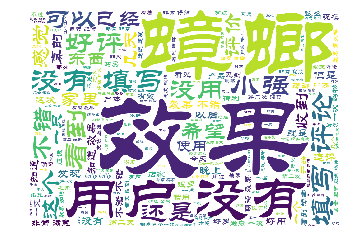

In [97]:
import jieba
import wordcloud
from wordcloud import STOPWORDS
words  = jieba.lcut(txt_kl)#列表，列表里面的元素为字符串格式
newtxt= ' '.join(words)
w=wordcloud.WordCloud(width=1000,height=700,stopwords=STOPWORDS,font_path="C:/Windows/Fonts/STLITI.ttf",background_color = 'white')
wordcloud=w.generate(newtxt)
plt.imshow(wordcloud)
plt.axis('off')

In [2]:
from aip import AipNlp

In [ ]:
app_id=''
app_key=''
secret_key =''
client= AipNlp(app_id,app_key,secret_key)